# Caso de Análisis: Tasa de Crimen

El archivo crimen.txt contiene información sobre tasas de crimen y algunas variables demográficas de 47 estados de Estados Unidos

Se solicita construir un modelo de regresión para predecir la tasa de crimen.

# **1. Importar Librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

from sklearn.preprocessing import StandardScaler

Se definen algunas funciones de utilidad

In [2]:
def correlation_heatmap(df):
    """Función para plotear las correlaciones de las variables de un dataset"""
    
    _ , ax = plt.subplots(figsize =(10, 6))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        fmt='.2f',
        linewidths=0.1,
        vmax=1.0,
        vmin=-1.0, 
        linecolor='white',
        annot_kws={'fontsize':8}
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=12)
    plt.show()

# **2.Cargar datos**

In [3]:
url_data='data/'
dfCrimen = pd.read_csv(url_data+'crimen.txt', delimiter='\t')
dfCrimen.head(5)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


# **3. Entendimiento de los datos**

Se tienen 15 variables predictoras numéricas.

In [4]:
dfCrimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 6.0 KB


47 filas con 16 columnas.

In [5]:
dfCrimen.shape

(47, 16)

Se dividen de una buena vez las variables predictoras del target a fin de realizar distintos tipos de procedimientos con cada una de estas variables

In [6]:
X = dfCrimen.drop(columns=['Crime'])
y = dfCrimen['Crime']

# **4. EDA**

Se realiza un EDA puntual a modo de entender las variables y su relación con el target. Se hace uso de:
- Diagrama de Dispersión
- Diagrama de correlación

## **4.1 Diagrama de dispersión** 

In [7]:
dfEDA = dfCrimen.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dfEDA[X.columns] = X_scaled

dfEDA['Crime'] = y


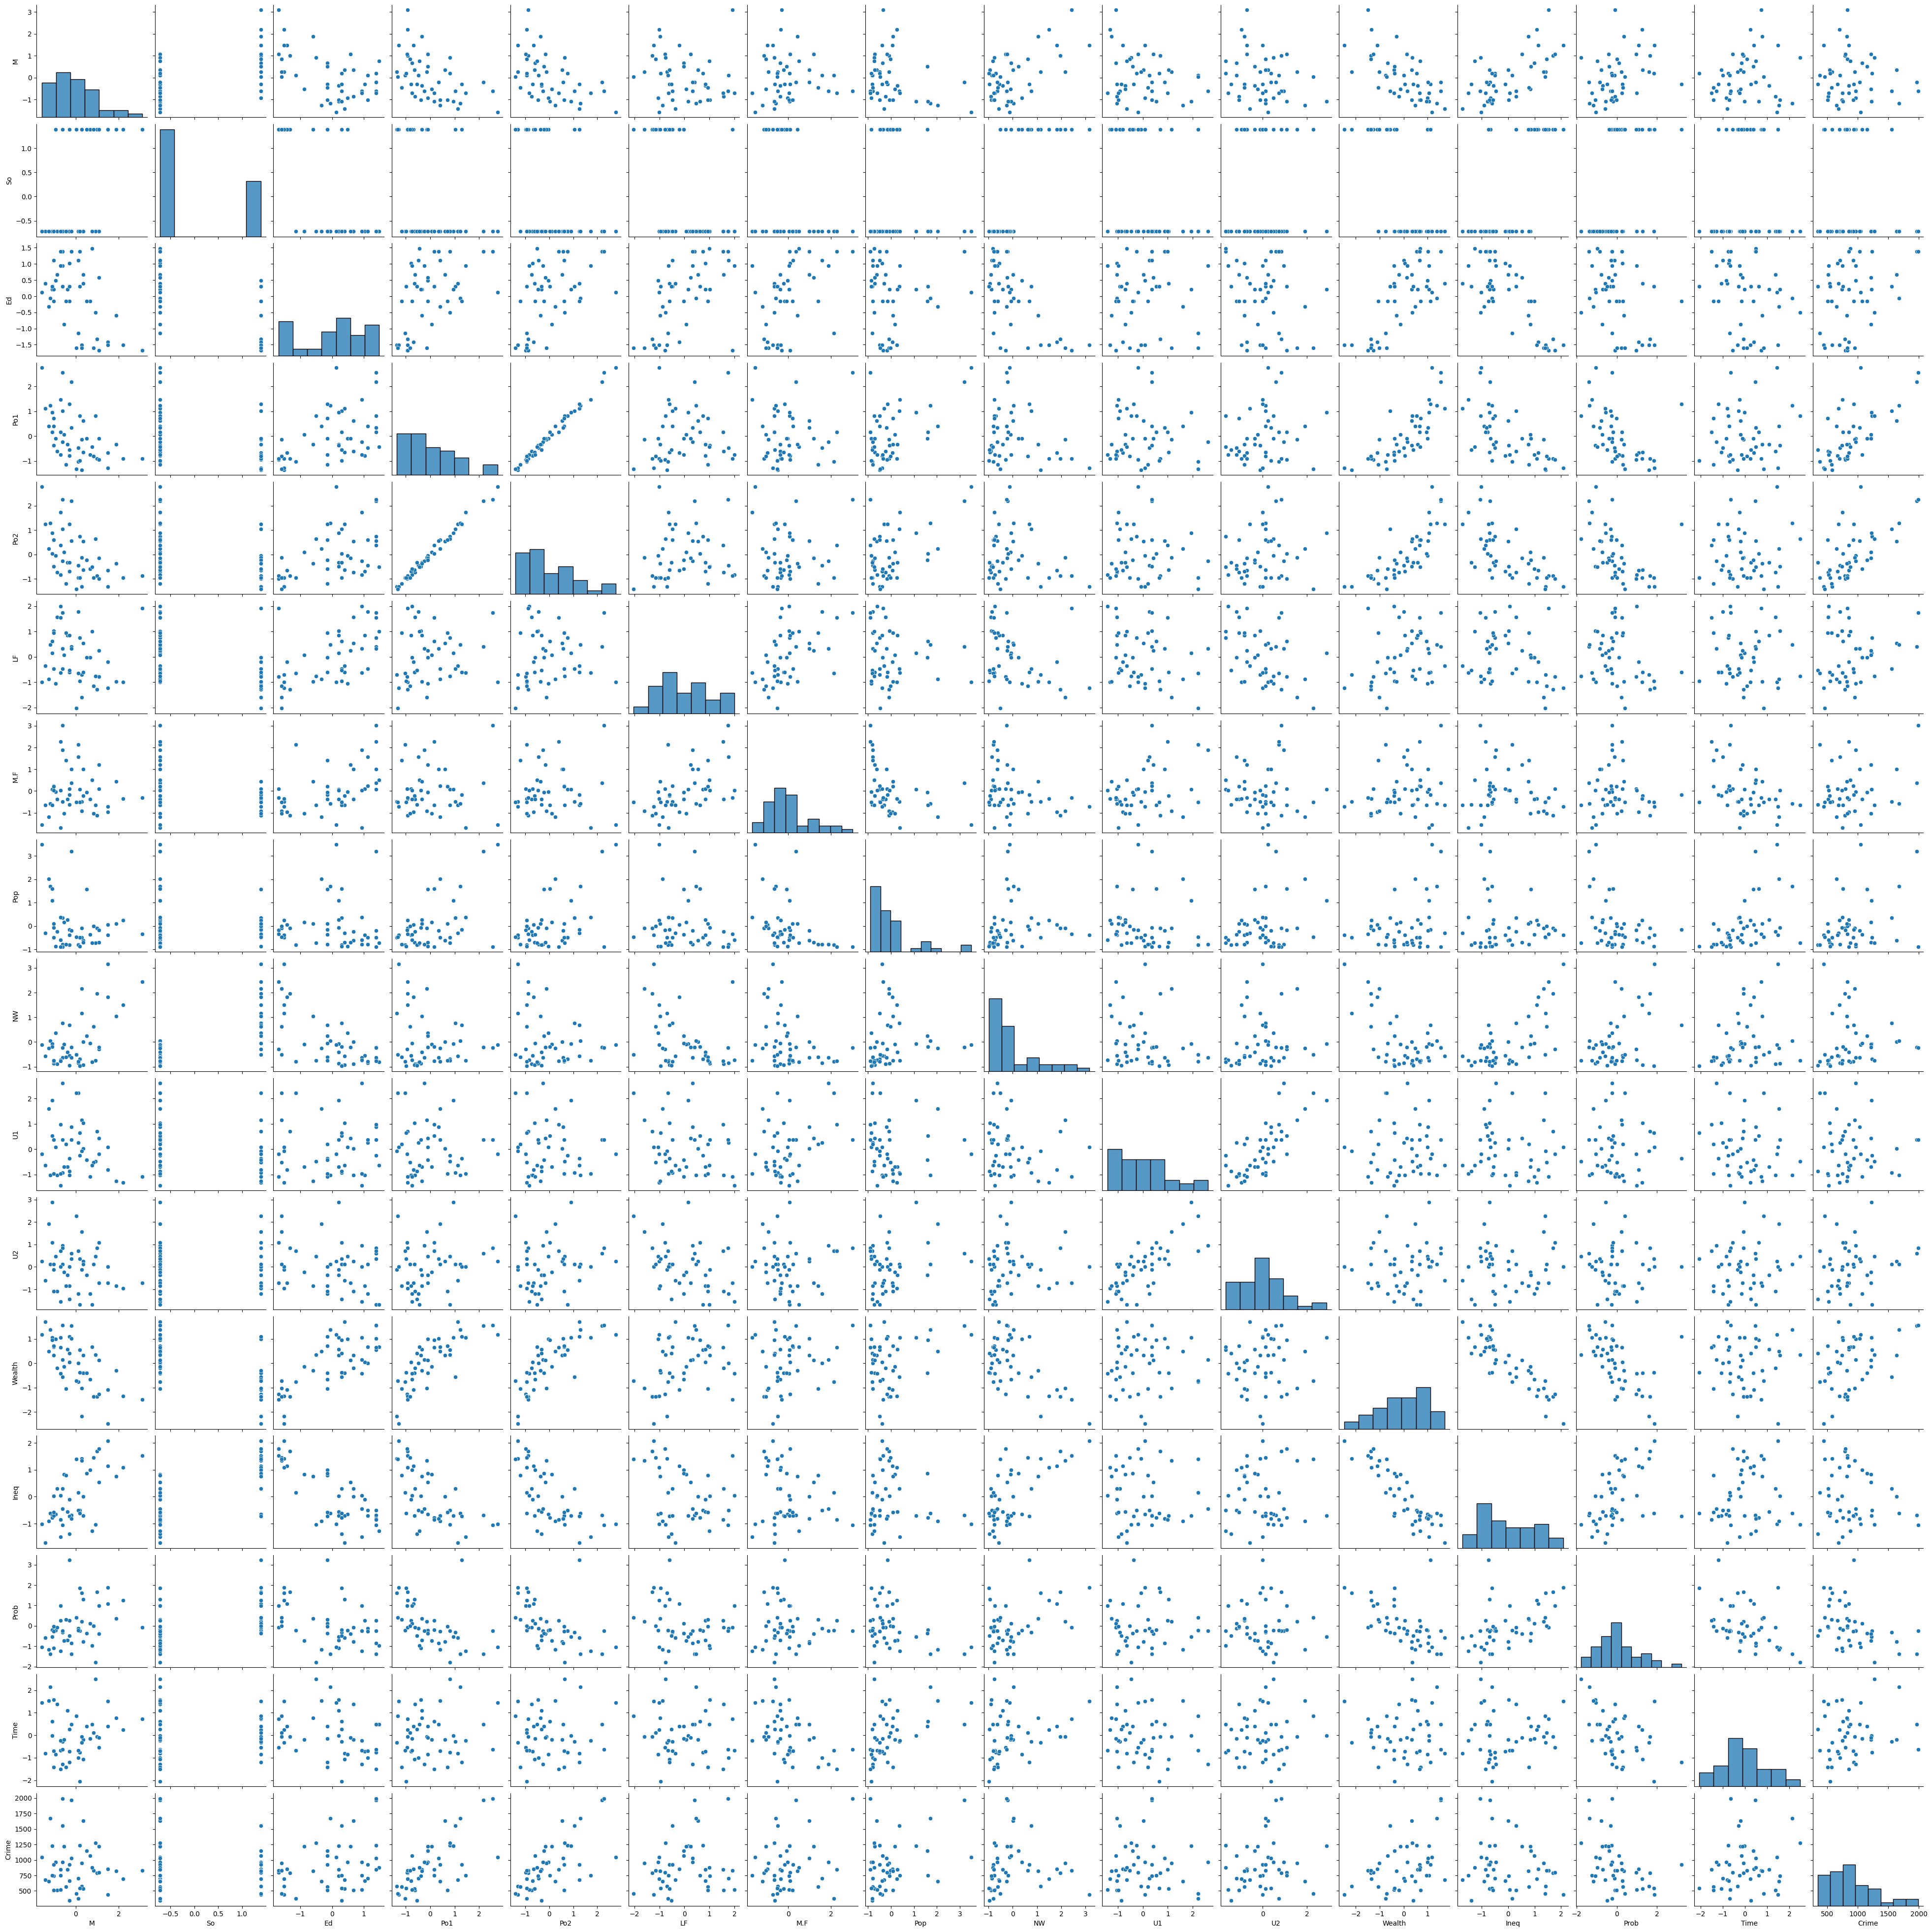

In [8]:

sns.pairplot(dfEDA)
plt.show()

No se visualiza claramente si existe una relación lineal o no a través del diagrama de dispersión. En ese sentido se realiza el diagrama de correlación a fin de validar el tipo de relación lineal que existen en el target y las variables predictorias, así como las variables predictorias en si.

## **4.2 Diagrama de Correlación** 

Se realiza el análisis de correlación empleando el método de Pearson.

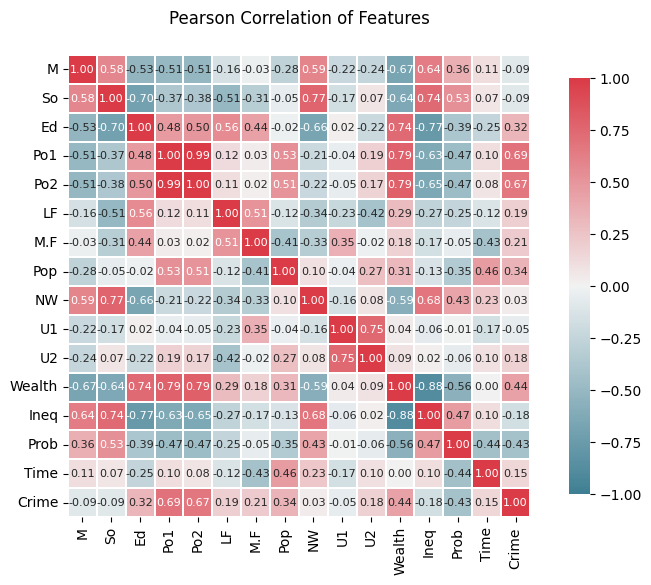

In [9]:
correlation_heatmap(dfEDA)

Teniendo en cuenta los rangos de correlación:

La clasificación de la fuerza de la correlación se basa comúnmente en el valor absoluto del coeficiente de correlación de Pearson (
𝑟
r). Aunque no hay límites estrictos universalmente aceptados, aquí hay una guía comúnmente utilizada:

- Correlación muy baja o despreciable: $0≤∣r∣<0.1$
- Correlación baja: $0.1≤∣r∣<0.3$
- Correlación moderada: $0.3≤∣r∣<0.5$
- Correlación alta: $0.5≤∣r∣<0.7$
- Correlación muy alta: $0.7≤∣r∣≤1.0$

Se obtienen los siguientes insights:

1. Correlación entre **Crime** y otras variables:
- Po1 (0.69) y Po2 (0.67): Ambas variables muestran una fuerte correlación positiva con **Crime**. Esto sugiere que a medida que los valores de **Po1** y **Po2** aumentan, el valor de **Crime** también tiende a aumentar.
- Wealth (0.44): Hay una moderada correlación positiva con **Crime**, lo que indica que un mayor nivel de riqueza está asociado con un aumento en los crímenes.

2. Variables con baja o negativa correlación con **Crime**:
- LF (-0.05), M.F (0.21), Pop (0.34), NW (0.21), U1 (0.03), U2 (0.18), Prob (0.13): Estas variables muestran una correlación baja o cercana a cero con Crime, lo que indica que no tienen una relación fuerte con la cantidad de crímenes.

3. Correlación entre las variables explicativas:
- Po1 y Po2 (0.99): Están casi perfectamente correlacionadas, lo que sugiere que ambas variables están casi linealmente dependientes entre sí. Esto puede causar problemas de multicolinealidad en el modelo.
- Wealth y Ineq (0.88): Tienen una correlación fuerte positiva, lo que indica que mayor riqueza está asociada con mayor desigualdad.
- NW y Ineq (0.77): Muestra una fuerte correlación positiva.

4. Multicolinealidad:
- Variables como Po1 y Po2, Wealth e Ineq, y NW e Ineq tienen alta correlación entre sí, lo que podría indicar problemas de multicolinealidad. Es importante considerar esto al ajustar el modelo OLS, ya que puede afectar la estabilidad y la interpretación de los coeficientes.

5. Conclusiones:
- Las variables Po1, Po2 y Wealth parecen ser importantes predictores de Crime.

La multicolinealidad entre algunas variables puede ser un problema, y es posible que se necesite algún tipo de regularización (como Ridge o Lasso) o la eliminación de variables altamente correlacionadas para obtener un modelo más estable.

**Se debe eliminar**

In [10]:
dfEDA_no_corr=dfEDA.drop(columns=['Po1','Wealth','Ineq','NW'])


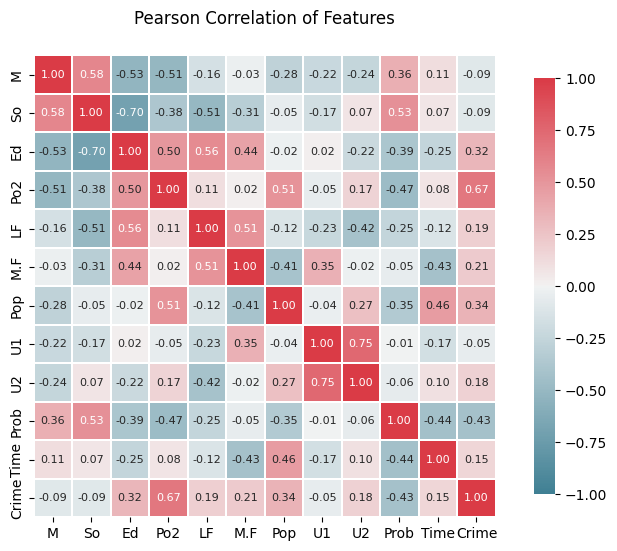

In [11]:
correlation_heatmap(dfEDA_no_corr)

Se retiraron 4 variables a fin de garantizar una menor correlación entre las variables predictoras. La correlación pasó de ser alta a tener una correlación entre baja y moderada.

In [12]:
X_no_corr= X.drop(columns=['Po1','Wealth','Ineq','NW'])

# **5. Pre-procesamiento de datos**

Normalización de los datos

Dado el rango y la naturaleza de las variables proporcionadas, puede ser beneficioso normalizar las variables antes de aplicar la regresión OLS. A continuación se presentan algunos puntos que justifican la normalización:

- Diferentes Escalas: Las variables como $Wealth$, $Pop$, y $Crime$ tienen rangos muy diferentes en comparación con variables como $LF$ y $Prob$. La normalización pondrá todas las variables en una escala similar, mejorando la estabilidad numérica y facilitando la interpretación de los coeficientes.
- Estabilidad Numérica: Las operaciones matriciales involucradas en la regresión OLS pueden ser más estables numéricamente cuando las variables están normalizadas.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_corr)

# **6. Estimación de Coeficientes**

En un modelo de Regresión Lineal la primera columna de unos se utiliza como término de intercepto (o bias). Se crea un nuevo conjunto de datos con esta columna

In [14]:
n_samples = X.shape[0]
X_model= np.c_[np.ones(n_samples), X_scaled]
X_model[0:3,:]

array([[ 1.        ,  0.99938191,  1.39194109, -1.32265632, -0.87606884,
        -1.28044059, -1.13271999, -0.09603392,  0.70262087,  0.840356  ,
         1.66759886, -0.05659903],
       [ 1.        ,  0.35594424, -0.71842121,  0.66517309,  0.53379436,
         0.54549111,  0.99404937, -0.62704499,  0.02982262,  0.24192067,
        -0.77765391, -0.18513811],
       [ 1.        ,  0.27551453,  1.39194109, -1.50336809, -1.30987289,
        -0.70514704, -0.48096809, -0.49429222, -0.08231042, -0.11714053,
         1.61420635, -0.32766929]])

## **6.1 Usando OLS**

En este caso se emplea un modelo de Regresión Lineal empleando el método de Minimos Cuadrados Ordinarios (OLS)

**Estimación OLS:** Mínimos cuadrados ordinarios es un estimador utilizado en regresión lineal para estimar los parámetros $\beta$ del modelo lineal. El coeficiente estimado está representado por $\hat{\beta}$. El objetivo de OLS es minimizar la suma de las diferencias al cuadrado entre la variable dependiente observada $𝑦_i$ y las predichas por la función lineal $h_\beta(i)=X_i\hat{\beta}$

**Función objetiva:**
La función de costos a minimizar es la suma de los residuos al cuadrado:

$$J(\hat{\beta})=\sum_{i=1}^n (X_i\hat{\beta}-y_i)^2$$

**Derivación de las estimaciones de MCO:**
Para encontrar los valores beta estimados $\hat{\beta}$ que minimizan la suma de los residuos al cuadrado, tomamos la derivada de la función objetivo con respecto a $\hat{\beta}$ y la establecemos en cero. Esto lleva a las ecuaciones normales.

Las ecuaciones normales son:

$$X^T X\hat{\beta} = X^T Y $$

Resolviendo para $\hat{\beta}$:

$$ \hat{\beta} = (X^T X)^{-1} X^T Y $$

Esta es la derivación de la solución en forma cerrada para minimizar la suma de residuos cuadrados (SSR) para regresión lineal simple y múltiple. Implementando en Python:

In [15]:
betas = np.dot(np.linalg.inv(np.dot(X_model.T, X_model)), np.dot(X_model.T, y))
variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, betas))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

,Variable,Coeficiente
0,Intercept,905.085106
1,M,127.987280
2,So,118.927663
3,Ed,94.039082
4,Po1,222.752788
5,Po2,51.934113
6,LF,93.475310
7,M.F,21.630812
8,Pop,-98.451811
9,NW,158.184884


Si valida estos coeficientes con un modelo ajustado usando Linear Regression de scikit-Learn.

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)  # fit_intercept=False ya que X ya incluye el intercepto
lin_reg.fit(X_model, y)
beta_lin_reg = lin_reg.coef_

variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, beta_lin_reg))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

,Variable,Coeficiente
0,Intercept,905.085106
1,M,127.987280
2,So,118.927663
3,Ed,94.039082
4,Po1,222.752788
5,Po2,51.934113
6,LF,93.475310
7,M.F,21.630812
8,Pop,-98.451811
9,NW,158.184884


## **6.2 Usando (Stochastic) Gradient Descent - SGD**

SGDRegressor en scikit-learn se refiere a **Stochastic Gradient Descent**, que actualiza los parámetros del modelo para cada ejemplo de entrenamiento. 

**SGDRegressor**: implementa el descenso de gradiente estocástico para ajustar iterativamente los coeficientes para minimizar la función de costo representada por $SSR$ multiplicada con el factor de normalización $(1/2n)$

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(fit_intercept=False,
                       max_iter=1000, 
                       tol=1e-3, 
                       eta0=0.01, 
                       learning_rate='constant')

sgd_reg.fit(X_model, y)
beta_sgd=sgd_reg.coef_

variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, beta_sgd))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

,Variable,Coeficiente
0,Intercept,898.188050
1,M,118.880213
2,So,123.301100
3,Ed,80.999394
4,Po1,226.750097
5,Po2,50.401627
6,LF,95.825982
7,M.F,15.401578
8,Pop,-80.778933
9,NW,131.160197


Se observan que los coeficientes son diferentes empleando SGD.

Veamos la medición de cada modelo.

# **7. Evaluación**

## 7.1 Métricas de Error

In [18]:
# OLS
y_pred_lr = lin_reg.predict(X_model)

from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred_lr)))

MAE: 165.65770973113786
MSE: 43895.05542319519
RMSE: 209.51146847653754


In [19]:
# SGD
y_pred_sgd = sgd_reg.predict(X_model)
                                    
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y, y_pred_sgd))
print('MSE:', metrics.mean_squared_error(y, y_pred_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred_sgd)))

MAE: 166.1310352861146
MSE: 44272.95565340722
RMSE: 210.41139620611622


Se realiza la interpretación de las métricas:

1. MAE (Mean Absolute Error):

- Es la media de los valores absolutos de los errores entre las predicciones y los valores reales.
- Un MAE más bajo indica que, en promedio, las predicciones del modelo están más cerca de los valores reales. En este caso, el modelo OLS tiene un MAE más bajo (209.511) en comparación con el modelo SGD (166.37), lo que sugiere que OLS tiene errores absolutos más pequeños en promedio.

2. MSE (Mean Squared Error):

- Es la media de los cuadrados de los errores entre las predicciones y los valores reales.
- Un MSE más bajo indica que el modelo tiene errores menores y más consistentes. Los errores grandes tienen un impacto mayor debido al cuadrado de los errores. Aquí, el modelo OLS tiene un MSE más bajo (43895.055) en comparación con el modelo SGD (44647.29), lo que indica que OLS tiene errores más pequeños y consistentes.

3. RMSE (Root Mean Squared Error):
- Es la raíz cuadrada del MSE y representa la magnitud del error de una manera que es interpretable en las mismas unidades que los valores reales.
- Similar al MSE, un RMSE más bajo indica un mejor ajuste del modelo. El modelo OLS tiene un RMSE más bajo (209.511) en comparación con el modelo SGD (211.299), lo que sugiere que OLS tiene un mejor ajuste en términos de la magnitud de los errores.

Conclusión:
Comparando las métricas de error para ambos modelos, el modelo OLS muestra un mejor desempeño que el modelo SGD. Tiene valores más bajos en MAE, MSE y RMSE. Esto indica que el modelo OLS produce predicciones más precisas y consistentes con respecto a los valores reales de la tasa de criminalidad.

## 7.2 Métricas de Bondad de Ajuste


Ahora queremos alguna forma de indicar qué tan estrechamente asociados están $X_i$ y $Y$, o qué parte de la variación de $Y se "explica" por la variación de $X_i$. Realizamos un análisis de varianza y eso nos lleva a las siguientes medidas de bondas de ajuste:

- **R2** mide la proporción de varianza en la variable dependiente que es predecible a partir de las variables independientes. Varía de 0 a 1, y los valores más altos indican un mejor poder explicativo.
- **R2-ajustado** ajusta el valor de R cuadrado para el número de predictores en el modelo. Tiene en cuenta la complejidad del modelo y es más informativo al comparar modelos con diferentes números de predictores.


Calculemos estos valores para el modelo estimado con OLS.

In [20]:
import statsmodels.api as sm

model_lr_ols_stats = sm.OLS(y, X_model).fit()

# R-squared
r_squared = model_lr_ols_stats.rsquared
print("R-squared:", r_squared)

# Adjusted R-squared
adj_r_squared = model_lr_ols_stats.rsquared_adj
print("Adjusted R-squared:", adj_r_squared)

R-squared: 0.7001759490932129
Adjusted R-squared: 0.605945533093937


Interpretación:
- Un **R2** de 0.70 indica que el 70% de la variabilidad en la tasa de criminalidad puede ser explicada por las variables predictoras. Esto sugiere que el modelo tiene un buen ajuste y es capaz de explicar una gran parte de la variabilidad en los datos.
- Un **R2-Ajustado** de 0.60 indica que, al tener en cuenta el número de predictores en el modelo, aproximadamente el 60.5% de la variabilidad en la tasa de criminalidad puede ser explicada por el modelo. El **R2-ajustado** es ligeramente menor que el **R2**, lo que es esperado ya que penaliza por el número de variables en el modelo.

## 7.3 Test de Significancia

Para este caso se usa el t-test y F-test:
- test-t evalúa si cada coeficiente ($𝛽_i$) es significativamente diferente de cero (hipótesis nula $𝐻_0$). Esto ayuda a determinar la importancia de cada predictor.
- test-F evalúa la significancia general del modelo de regresión. Prueba si al menos un predictor está significativamente relacionado con la variable de respuesta.

In [21]:
X.columns

Index(['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2', 'Wealth', 'Ineq', 'Prob', 'Time'], dtype='object')

In [22]:
# Obtener los resultados del t-test y F-test
t_values = model_lr_ols_stats.tvalues
p_values = model_lr_ols_stats.pvalues
f_statistic = model_lr_ols_stats.fvalue
f_p_value = model_lr_ols_stats.f_pvalue

variable_names = ['Intercept'] + ['M', 'So', 'Ed', 'Po2', 'LF', 'M.F', 'Pop', 'U1', 'U2', 'Prob', 'Time']
results_df = pd.DataFrame({
    'Variable': variable_names,
    'Coefficient': model_lr_ols_stats.params,
    't_value': t_values,
    'p_value': p_values
})

results_df['F-statistic'] = f_statistic
results_df['F-p_value'] = f_p_value

# Mostrar el DataFrame
results_df

,Variable,Coefficient,t_value,p_value,F-statistic,F-p_value
const,Intercept,905.085106,25.557339,3.154595e-24,7.430466,0.000002
x1,M,127.987280,2.301827,2.741330e-02,7.430466,0.000002
x2,So,118.927663,1.821846,7.703348e-02,7.430466,0.000002
x3,Ed,94.039082,1.370873,1.791419e-01,7.430466,0.000002
x4,Po2,222.752788,3.514691,1.237389e-03,7.430466,0.000002
x5,LF,51.934113,0.848200,4.020903e-01,7.430466,0.000002
x6,M.F,93.475310,1.430821,1.613499e-01,7.430466,0.000002
x7,Pop,21.630812,0.398482,6.926958e-01,7.430466,0.000002
x8,U1,-98.451811,-1.160989,2.535040e-01,7.430466,0.000002
x9,U2,158.184884,2.019945,5.109590e-02,7.430466,0.000002


In [23]:
# Otra forma
model_lr_ols_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7.430
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           2.24e-06
Time:                        06:05:44   Log-Likelihood:                -317.89
No. Observations:                  47   AIC:                             659.8
Df Residuals:                      35   BIC:                             682.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        905.0851     35.414     25.557      0.000     833.191     976.979
x1           127.9873     55.602      2.302      0.027      15.108     240.866
x2           118.9277     65.279      1.822      0.077     -13.595     251.450
x3            94.0391     68.598      1.371      0.179     -45.222     233.300
x4           222.7528     63.378      3.515      0.001      94.089     351.416
x5            51.9341     61.229      0.848      0.402     -72.367     176.235
x6            93.4753     65.330      1.431      0.161     -39.151     226.102
x7            21.6308     54.283      0.398      0.693     -88.570     131.831
x8           -98.4518     84.800     -1.161      0.254    -270.605      73.701
x9           158.1849     78.311      2.020      0.051      -0.796     317.166
x10          -94.8510     54.704     -1.734      0.092    -205.906      16.204
x11            4.0032     53.551      0.075      0.941    -104.711     112.717
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.134
Skew:                           0.129   Prob(JB):                        0.935
Kurtosis:                       2.959   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretación:

$t-test$

Para realizar el análsis t-test tomaremos tres variables:  **Po2**, **LF** y **U2**. He tomado estas variables ya que en el diagrama de correlación la primera presenta altos valores de correlación y las dos últimas bajos valores de correlación con el target. Veamos su siginificancia con la prueba-t.

- Coeficiente para beta_Po2: 222.752788 con $p-value$ :0.001
- Coeficiente para beta_LF: 51.934113 con $p-value$: 0.402
- Coeficiente para beta_U2: 158.184884 con $p-value$: 0.051

Tipicamente, si **p-value ≤ 0.05**, we reject $𝐻_0$. En este caso:

Variable $Po2$
- Interpretación del Coeficiente: Este coeficiente indica que, manteniendo todas las demás variables constantes, un aumento de una unidad en el gasto per cápita en protección policial en 1959 se asocia con un aumento de 222.752788 unidades en la tasa de criminalidad.
- Significancia: El p-value 0.001 es menor que 0.05, por lo que se rechaza la hipótesis nula de que el coeficiente de Po2 es cero. Esto sugiere que Po2 es estadísticamente significativo al nivel del 5%.

Variable $LF$
- Interpretación del Coeficiente: Este coeficiente indica que, manteniendo todas las demás variables constantes, un aumento de una unidad en la tasa de participación en la fuerza laboral de varones urbanos civiles de 14-24 años se asocia con un aumento de 51.934113 unidades en la tasa de criminalidad.
- Significancia: El p-value de 0.402 es mayor que 0.05, por lo que NO se puede rechazar la hipótesis nula de que el coeficiente de LF es cero. Esto sugiere que LF no es estadísticamente significativo al nivel del 5%.

Variable $U2$
- Interpretación del Coeficiente: Este coeficiente indica que, manteniendo todas las demás variables constantes, un aumento de una unidad en la tasa de desempleo de varones urbanos de 35-39 años se asocia con un aumento de 158.184884 unidades en la tasa de criminalidad.
- Significancia: El p-value 0.051 es ligeramente mayor que 0.05, por lo que, estrictamente hablando, no se puede rechazar la hipótesis nula de que el coeficiente de U2 es cero al nivel del 5%. Sin embargo, es muy cercano al umbral de significancia, lo que sugiere que U2 podría tener una relación con la tasa de criminalidad que vale la pena explorar más a fondo.

$F-test$

Decision: Tipicamente, si **p-value ≤0.05**, se rechaza $𝐻_0$. Indicando que el modelo general es estadísticamente significativo

Para nuestro caso: $F-statistic:$ 7.430466, $p-value:$ 0.000002

La prueba-F y su p-value sugieren que el modelo en su conjunto es significativo. El p-value del F-test es muy pequeño $0.000002≤0.05$, lo que indica que al menos una de las variables explicativas tiene un coeficiente distinto de cero al nivel del 5%. Esto respalda la validez general del modelo a pesar de que algunas variables individuales no sean significativas.

# 8. Predicción

Como parte del análisis se resuelve:

Predecir la tasa de crimen en un estado con las siguientes características:

- M = 14.0
- So = 0
- Ed = 10.0
- Po1 = 12.0
- Po2 = 15.5
- LF = 0.640
- M.F = 94.0
- Pop = 150
- NW = 1.1
- U1 = 0.120
- U2 = 3.6
- Wealth = 3200
- Ineq = 20.1
- Prob = 0.04
- Time = 39.0

Crear DataFrame a partir de las características del nuevo estado

In [24]:
new_state = {
    'M': 14.0,
    'So': 0,
    'Ed': 10.0,
    'Po1': 12.0,
    'Po2': 15.5,
    'LF': 0.640,
    'M.F': 94.0,
    'Pop': 150,
    'NW': 1.1,
    'U1': 0.120,
    'U2': 3.6,
    'Wealth': 3200,
    'Ineq': 20.1,
    'Prob': 0.04,
    'Time': 39.0
}

new_state_df = pd.DataFrame([new_state])


In [25]:
new_state_df_no_corr=new_state_df.drop(columns=['Po1','Wealth','Ineq','NW'])

Normalizar las nuevas características usando el mismo scaler

In [26]:
new_state_scaled = scaler.transform(new_state_df_no_corr)
new_state_scaled

array([[ 0.11465512, -0.71842121, -0.50945338,  2.70281465,  1.9712186 ,
        -1.4757473 ,  3.01038088,  1.37541913,  0.24192067, -0.3152596 ,
         1.7689212 ]])

Añadir una columna de unos para el término de intercepto

In [27]:
new_state_scaled_with_intercept = np.c_[np.ones(1), new_state_scaled]
new_state_scaled_with_intercept

array([[ 1.        ,  0.11465512, -0.71842121, -0.50945338,  2.70281465,
         1.9712186 , -1.4757473 ,  3.01038088,  1.37541913,  0.24192067,
        -0.3152596 ,  1.7689212 ]])

Predecir la tasa de crimen para el nuevo estado

In [28]:
predicted_crime_rate = lin_reg.predict(new_state_scaled_with_intercept)
print("Tasa de Criminalidad Predecido:", predicted_crime_rate[0])

Tasa de Criminalidad Predecido: 1357.8546078327558


In [29]:
predicted_crime_rate = model_lr_ols_stats.predict(new_state_scaled_with_intercept)
print("Tasa de Criminalidad Predecido:", predicted_crime_rate[0])

Tasa de Criminalidad Predecido: 1357.8546078327563


# Consideraciones

La interpretación de los coeficientes en un modelo de regresión debe hacerse con cautela, especialmente cuando se trata de relaciones complejas como las que involucran tasas de criminalidad y gasto en protección policial. Aunque el coeficiente positivo de Po2 (gasto per cápita en protección policial en 1959) indica que un aumento en este gasto se asocia con un aumento en la tasa de criminalidad, esto no necesariamente implica causalidad. Aquí hay algunas posibles explicaciones para esta observación:

- Causalidad inversa: Es posible que los estados con tasas de criminalidad más altas gasten más en protección policial en un intento de reducir la criminalidad. En este caso, la alta criminalidad podría haber llevado a un mayor gasto en protección policial, en lugar de que el gasto en protección policial cause un aumento en la criminalidad.

- Variables omitidas: Pueden existir variables no incluidas en el modelo que influyen tanto en el gasto en protección policial como en la tasa de criminalidad. Por ejemplo, factores socioeconómicos, niveles de pobreza, educación y desempleo pueden influir en ambos.

- Tiempo de respuesta: El gasto en protección policial puede no tener un efecto inmediato en la reducción de la criminalidad. Los beneficios de un mayor gasto en protección policial podrían no manifestarse hasta después de algún tiempo, mientras que el modelo analiza datos en un solo punto en el tiempo o con un desfase temporal inadecuado.

- Medidas reactivas: Los estados pueden aumentar el gasto en protección policial como una medida reactiva en respuesta a un aumento en la criminalidad. Por lo tanto, el aumento en el gasto es una consecuencia de la criminalidad existente, no una causa de la misma.

- Ineficiencia: No todo el gasto en protección policial se traduce necesariamente en una reducción de la criminalidad. Factores como la eficiencia del gasto, la corrupción, la formación del personal y la implementación de políticas efectivas pueden influir en la efectividad del gasto en protección policial.

Se analiza cada variable propuesta:

Po2:
- Conclusión: Aunque el coeficiente de Po2 es significativo y positivo, sugiriendo una asociación entre mayor gasto en protección policial y mayores tasas de criminalidad, esta relación probablemente refleja causalidad inversa o factores omitidos más que una verdadera - causalidad directa. **La interpretación debe ser que los estados con alta criminalidad tienden a gastar más en protección policial.**

LF:
- Conclusión: La tasa de participación en la fuerza laboral de varones urbanos civiles de 14-24 años no muestra una relación significativa con la tasa de criminalidad, lo que sugiere que esta variable no es un predictor fuerte de la criminalidad en el modelo actual.

U2:
- Conclusión: La tasa de desempleo de varones urbanos de 35-39 años tiene un valor p cercano al umbral de significancia, lo que sugiere que podría tener una relación con la criminalidad que vale la pena investigar más a fondo. Aunque no es estadísticamente significativa al nivel del 5%, la relación podría ser más clara con un análisis adicional o un mayor tamaño de muestra.